In [1]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
image = imread("venezia.jpg")
image.shape

(418, 640, 3)

The following code reshapes the array to get a
long list of RGB colors, then it clusters these colors using K-Means. 
For example, it
may identify a color cluster for all shades of blue. Next, for each color, it looks for the mean color of the pixel’s color cluster. For example, all shades
of blue may be replaced with the same turquoise color (assuming the mean color of
the blue cluster is turquoise). 

In [2]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [3]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

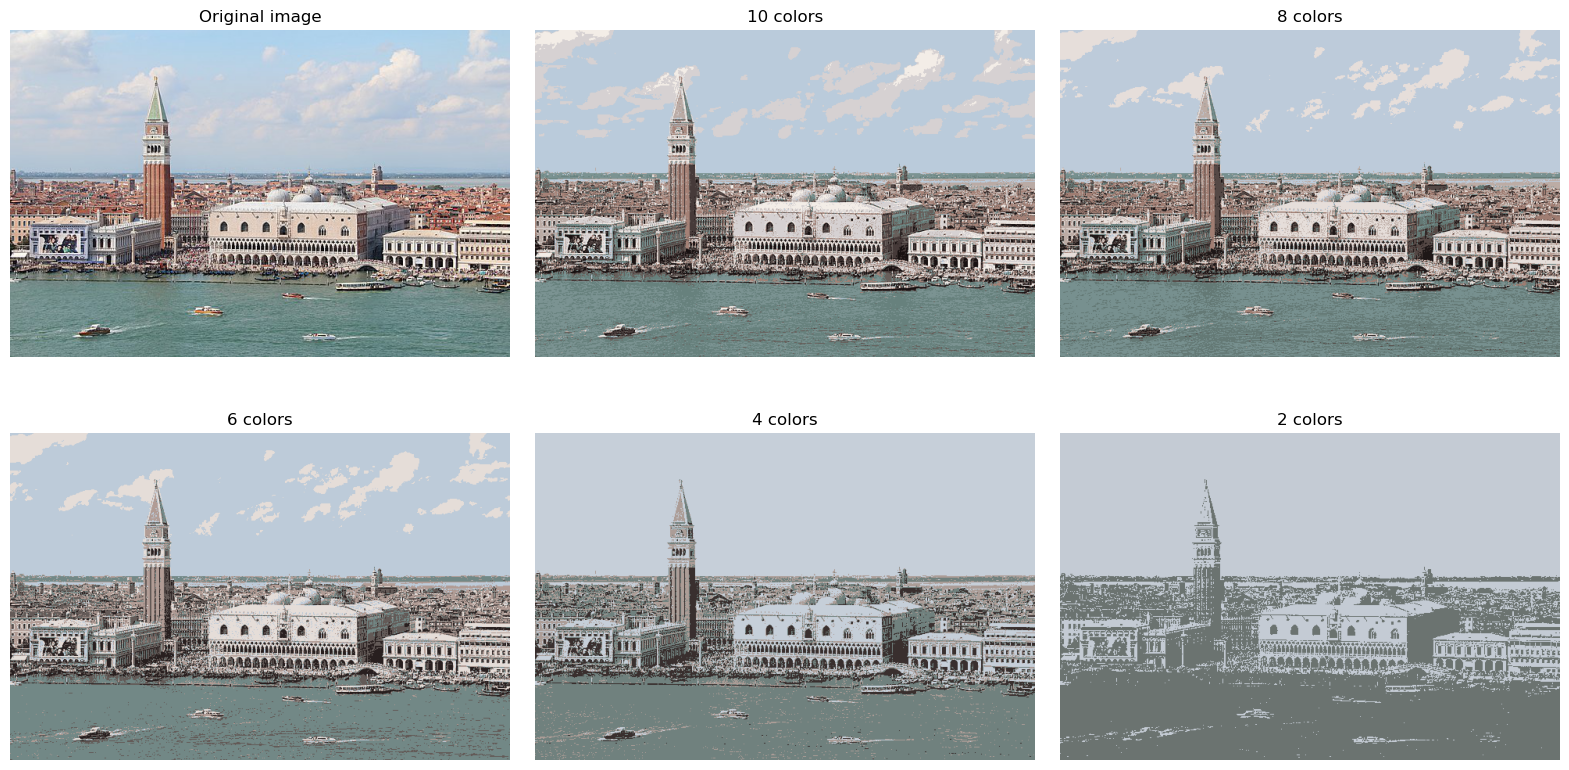

In [4]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image.astype(np.uint8))
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype(np.uint8))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [ ]:
#Source: Notebook adapted from A.Geron, Hands On ML with Scikit-Learn, Keras und Tensorflow, O'Reilly